<a href="https://www.kaggle.com/code/mohamedmustafashaban/placement-ml-analysis-80?scriptVersionId=223633341" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Dataset Details

1. **Columns and Their Significance**:
   - **StudentID**: Serves as a unique identifier for tracking individual students, important for merging or referencing data.
   - **CGPA**: A crucial metric reflecting academic performance; higher CGPA typically correlates with better placement chances.
   - **Internships**: Practical experience often enhances employability; the number of internships may indicate a student's commitment to gaining real-world experience.
   - **Projects**: Involvement in projects demonstrates practical skills and application of knowledge, which are attractive to employers.
   - **Workshops/Certifications**: Additional qualifications can differentiate students in competitive job markets.
   - **AptitudeTestScore**: Standardized scores often used by employers to gauge problem-solving and analytical skills.
   - **SoftSkillsRating**: Soft skills are increasingly valued by employers; this rating can help predict a student's interpersonal effectiveness.
   - **ExtracurricularActivities**: Participation can indicate a well-rounded candidate; students engaged in extracurriculars may show leadership and teamwork abilities.
   - **PlacementTraining**: Indicates whether students received specific training to enhance their employability.
   - **SSC_Marks**: Secondary education marks that may impact initial job opportunities or perceptions by employers.
   - **HSC_Marks**: Higher secondary education marks that can also influence placement status.
   - **PlacementStatus**: The target variable for prediction, showing whether a student was successfully placed after graduation.
   - 
2. **Data Characteristics**:
   - The dataset consists of **10,000 entries**, making it a substantial size for analysis.
   - Each entry includes **12 fields**, which provide a mix of categorical and numerical data.




### Notebook Components

1. **Data Import and Setup**:
   - Libraries such as `pandas`, `numpy`, and visualization libraries like `matplotlib` and `seaborn` are imported for data manipulation and visualization.
   - Warnings are suppressed for cleaner output.

2. **Data Loading**:
   - The dataset is read from a CSV file using `pd.read_csv()`, which loads the data into a Pandas DataFrame for analysis.

3. **Initial Exploration**:
   - **Head of the Data**: The first few rows are displayed to give an overview of the dataset structure.
   - **Null Value Check**: The presence of null values is assessed to ensure data quality.
   - **Data Info**: Provides a concise summary of the dataset, including data types and non-null counts.

4. **Statistical Summary**:
   - Descriptive statistics (`data.describe()`) are generated to understand the distribution and range of numerical features.

5. **Visualizations**:
   - **Histograms**: Display distributions for key features:
     - **CGPA**: Understanding the spread of academic performance.
     - **AptitudeTestScore**: Analyzing candidate potential based on test scores.
     - **SoftSkillsRating**: Insights into perceived interpersonal skills.
     - **SSC and HSC Marks**: Examining educational backgrounds.

6. **Modeling Framework** (implied):
   - Although not explicitly detailed in the provided content, the notebook likely includes:
     - **Train-Test Split**: Dividing the dataset into training and testing subsets using `train_test_split`.
     - **Model Selection**: Utilizing classifiers from `sklearn` (e.g., `RandomForestClassifier`, `SVC`) for predictive modeling.
     - **Hyperparameter Tuning**: Possibly using techniques like `GridSearchCV` for optimizing model parameters.
     - **Model Evaluation**: Assessing model performance using metrics like accuracy, F1 score, confusion matrix, and classification reports.

### 1. Introduction to the Project
The goal of this project is to analyze a dataset related to student placements and predict whether a student will be placed or not based on various features. The dataset includes academic scores, participation in internships, workshops, and soft skills ratings, among others.

### 2. Environment Setup
- **Import Libraries**: 
  - Import necessary libraries such as `pandas`, `numpy`, `sklearn`, `matplotlib`, and `seaborn`.
  - Set any configurations, like ignoring warnings for cleaner output.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')


### 3. Data Loading
- Load the dataset from a CSV file into a Pandas DataFrame.
- Display the first few rows to understand the structure of the data.

In [2]:
data = pd.read_csv('/kaggle/input/placement-prediction-dataset/placementdata.csv')

In [3]:
data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed



### 4. Data Exploration
- **Check for Missing Values**: Identify any columns with null values.

In [4]:
data.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

- **Data Information**: Get a summary of the dataset, including data types and non-null counts.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


- **Descriptive Statistics**: Generate statistics for numerical features to understand their distribution.

In [6]:
data.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


### 5. Data Visualization
- Use histograms to visualize the distribution of key features, such as:
  - CGPA
  - Aptitude Test Scores
  - Soft Skills Rating
  - SSC and HSC Mark

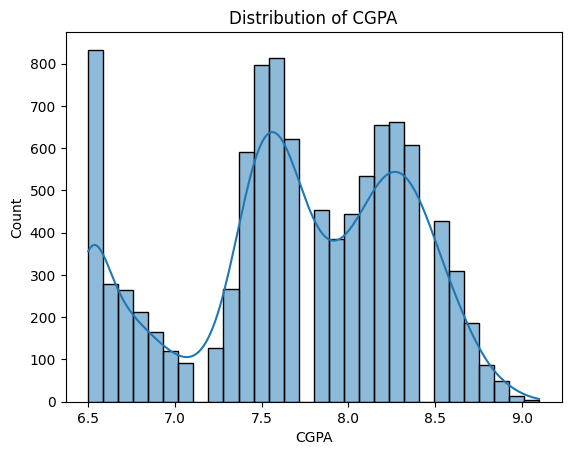

In [7]:
sns.histplot(data['CGPA'], bins=30, kde=True)
plt.title('Distribution of CGPA')
plt.show()

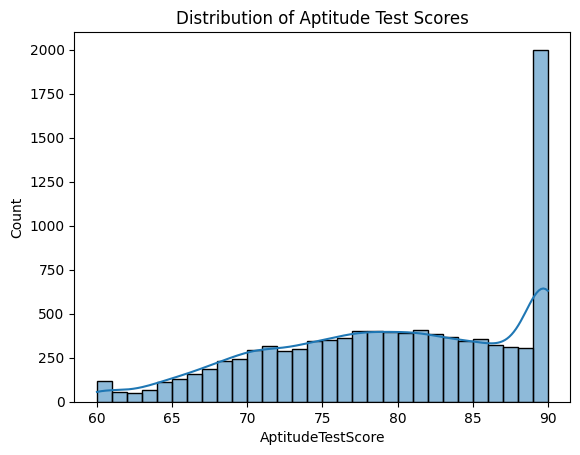

In [8]:
sns.histplot(data['AptitudeTestScore'], bins=30, kde=True)
plt.title('Distribution of Aptitude Test Scores')
plt.show()

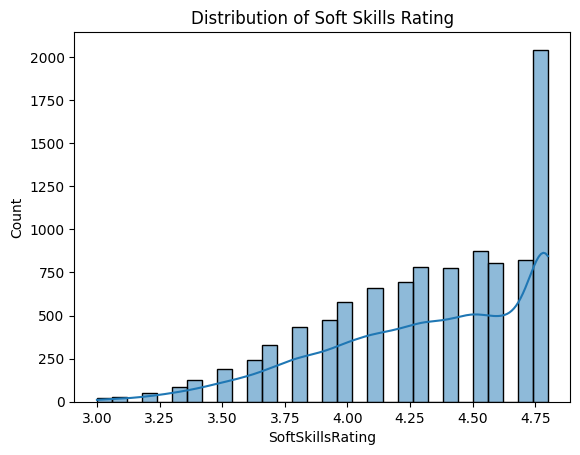

In [9]:
sns.histplot(data['SoftSkillsRating'], bins=30, kde=True)
plt.title('Distribution of Soft Skills Rating')
plt.show()

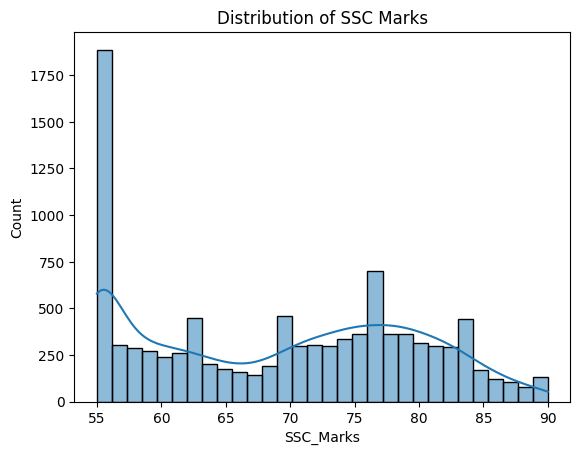

In [10]:
sns.histplot(data['SSC_Marks'], bins=30, kde=True)
plt.title('Distribution of SSC Marks')
plt.show()

Text(0.5, 1.0, 'Distribution of HSC Marks')

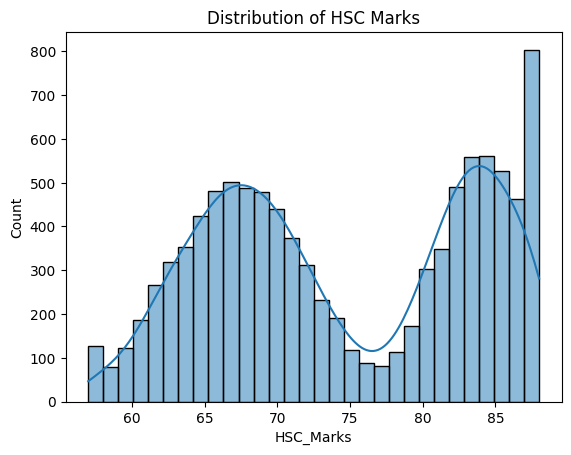

In [11]:
sns.histplot(data['HSC_Marks'], bins=30, kde=True)
plt.title('Distribution of HSC Marks')

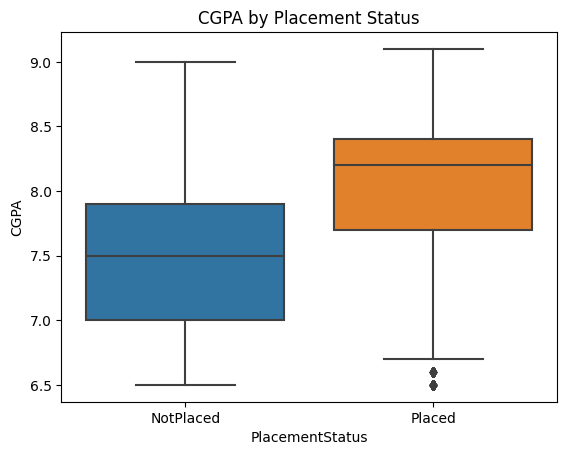

In [12]:
sns.boxplot(x='PlacementStatus', y='CGPA', data=data)
plt.title('CGPA by Placement Status')
plt.show()

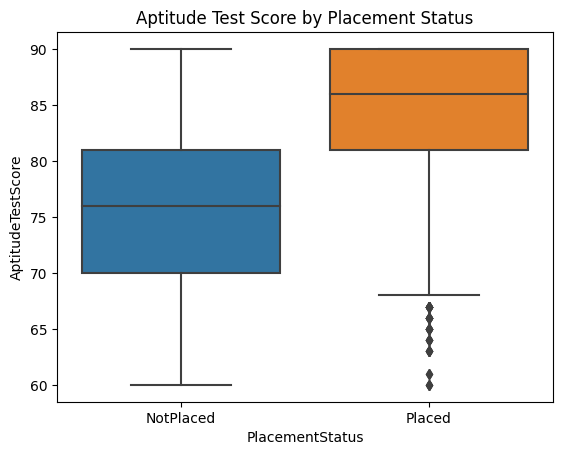

In [13]:
sns.boxplot(x='PlacementStatus', y='AptitudeTestScore', data=data)
plt.title('Aptitude Test Score by Placement Status')
plt.show()

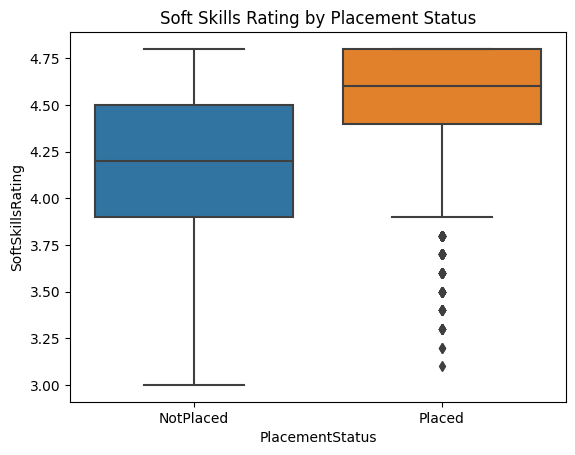

In [14]:
sns.boxplot(x='PlacementStatus', y='SoftSkillsRating', data=data)
plt.title('Soft Skills Rating by Placement Status')
plt.show()

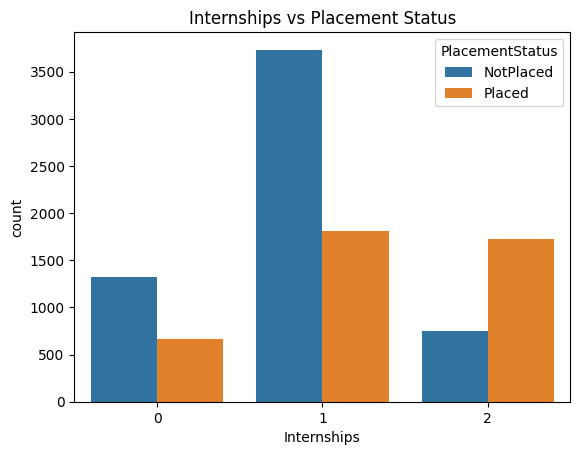

In [15]:
sns.countplot(x='Internships', hue='PlacementStatus', data=data)
plt.title('Internships vs Placement Status')
plt.show()

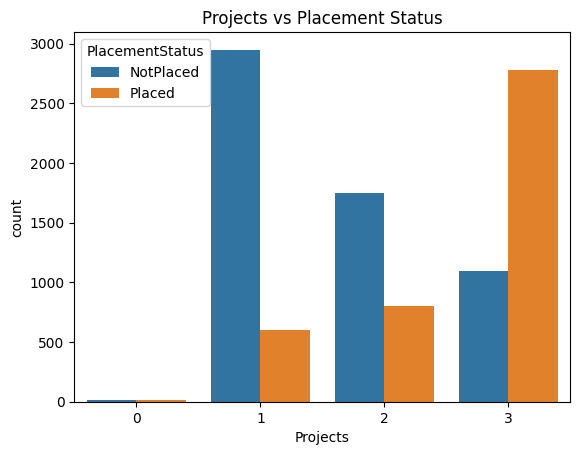

In [16]:
sns.countplot(x='Projects', hue='PlacementStatus', data=data)
plt.title('Projects vs Placement Status')
plt.show()

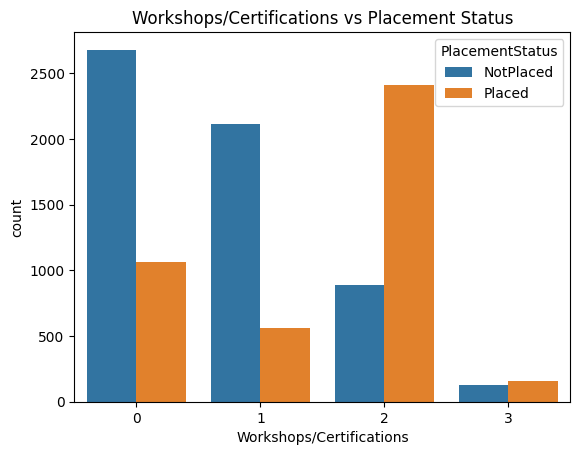

In [17]:
sns.countplot(x='Workshops/Certifications', hue='PlacementStatus', data=data)
plt.title('Workshops/Certifications vs Placement Status')
plt.show()

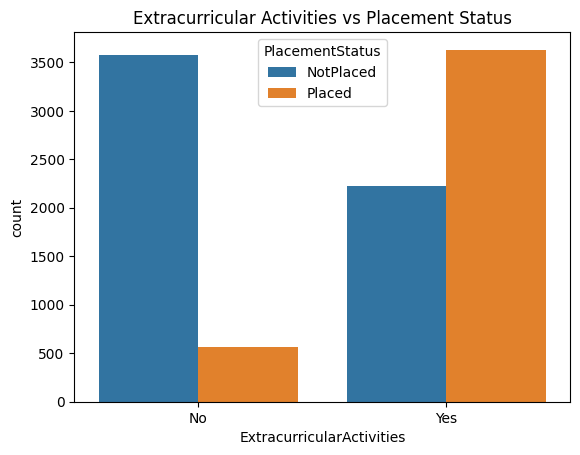

In [18]:
sns.countplot(x='ExtracurricularActivities', hue='PlacementStatus', data=data)
plt.title('Extracurricular Activities vs Placement Status')
plt.show()

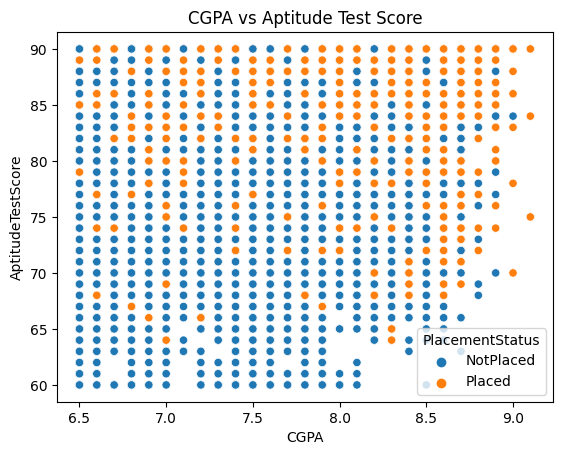

In [ ]:
sns.scatterplot(x='CGPA', y='AptitudeTestScore', hue='PlacementStatus', data=data)
plt.title('CGPA vs Aptitude Test Score')
plt.show()

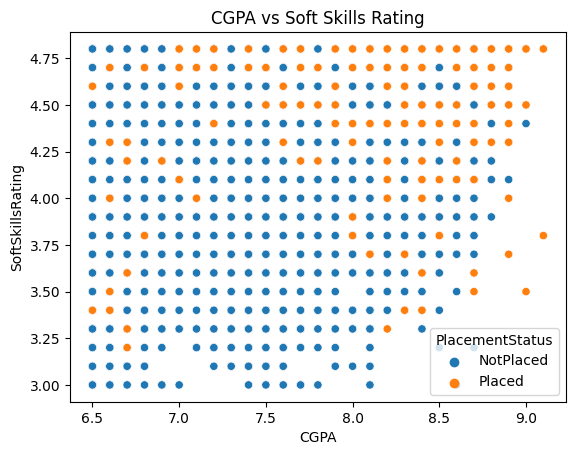

In [20]:
sns.scatterplot(x='CGPA', y='SoftSkillsRating', hue='PlacementStatus', data=data)
plt.title('CGPA vs Soft Skills Rating')
plt.show()

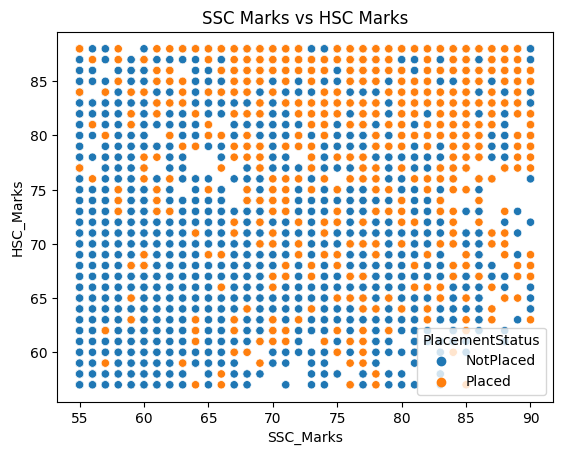

In [21]:
sns.scatterplot(x='SSC_Marks', y='HSC_Marks', hue='PlacementStatus', data=data)
plt.title('SSC Marks vs HSC Marks')
plt.show()

### 6. Data Preprocessing
- **Feature Selection**: Identify which features will be used for modeling.
- **Encoding Categorical Variables**: Convert categorical variables (e.g., `ExtracurricularActivities`, `PlacementTraining`, `PlacementStatus`) into numerical format using methods like `OneHotEncoder`.
- **Normalization/Standardization**: Scale numerical features if necessary

In [22]:
data['ExtracurricularActivities'] = data['ExtracurricularActivities'].astype('category')
data['PlacementTraining'] = data['PlacementTraining'].astype('category')

In [23]:
X = data.drop(['PlacementStatus'], axis=1)
y = data['PlacementStatus'].map({'Placed': 1, 'NotPlaced': 0})

### 7. Train-Test Split
- Split the dataset into training and testing sets. Ensure that the target variable 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['category']).columns.tolist()

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [27]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),
    ('model', RandomForestClassifier())  
])


### 8. Model Selection and Training
- Choose a classification model (e.g., Random Forest) and fit it to the training data.

In [28]:
models = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'model__n_estimators': [100, 200, 300],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        }
    },
    'SVM': {
        'model': SVC(),
        'param_grid': {
            'model__C': [0.1, 1, 10],
            'model__kernel': ['linear', 'rbf'],
            'model__gamma': ['scale', 'auto']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'model__n_neighbors': [3, 5, 7, 9],
            'model__weights': ['uniform', 'distance']
        }
    },
    'NaiveBayes': {
        'model': GaussianNB(),
        'param_grid': {}
    }
}

In [29]:
for name, config in models.items():
    print(f"model eva {name}:")
    
    pipeline.set_params(model=config['model'])
    
    if config['param_grid']:
        grid_search = GridSearchCV(estimator=pipeline, param_grid=config['param_grid'], cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print("Best parameters:", grid_search.best_params_)
    else:
        pipeline.fit(X_train, y_train)
        best_model = pipeline
    
    
    y_pred = best_model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

model eva RandomForest:
Best parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Accuracy: 0.7865
F1 Score: 0.7391569945021381
Confusion Matrix:
 [[968 204]
 [223 605]]


model eva SVM:
Best parameters: {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'linear'}
Accuracy: 0.7925
F1 Score: 0.7537091988130563
Confusion Matrix:
 [[950 222]
 [193 635]]


model eva KNN:
Best parameters: {'model__n_neighbors': 9, 'model__weights': 'uniform'}
Accuracy: 0.777
F1 Score: 0.7300242130750606
Confusion Matrix:
 [[951 221]
 [225 603]]


model eva NaiveBayes:
Accuracy: 0.787
F1 Score: 0.7418181818181818
Confusion Matrix:
 [[962 210]
 [216 612]]




### 9. Model Evaluation
- Evaluate the model on the test set using metrics like accuracy, confusion matrix, and classification report.

In [30]:
import joblib

# Save the complete pipeline
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [31]:
import pandas as pd
import joblib

# Load the complete pipeline
model_path = '/kaggle/working/best_model.pkl'
pipeline = joblib.load(model_path)

# Prepare new data for prediction including StudentID (if required)
new_data = pd.DataFrame({
    'StudentID': [1],  # Include this if the model was trained with it
    'CGPA': [8.2],
    'Internships': [1],
    'Projects': [2],
    'Workshops/Certifications': [1],
    'AptitudeTestScore': [85],
    'SoftSkillsRating': [4.5],
    'ExtracurricularActivities': ['Yes'],
    'PlacementTraining': ['Yes'],
    'SSC_Marks': [75],
    'HSC_Marks': [85]
})

# Ensure the new data has the correct structure
expected_columns = ['StudentID', 'CGPA', 'Internships', 'Projects', 
                    'Workshops/Certifications', 'AptitudeTestScore', 
                    'SoftSkillsRating', 'ExtracurricularActivities', 
                    'PlacementTraining', 'SSC_Marks', 'HSC_Marks']

# Check for any missing expected columns
for col in expected_columns:
    if col not in new_data.columns:
        new_data[col] = None  # Handle missing columns as needed

# Make predictions
try:
    predictions = pipeline.predict(new_data)
    # Output predictions
    print("Predicted Placement Status:", "Placed" if predictions[0] == 1 else "Not Placed")
except KeyError as e:
    print(f"KeyError: {e}. Ensure that the new data has the same columns as the training data.")

Predicted Placement Status: Placed


### Conclusion
The notebook aims to provide a comprehensive analysis of factors impacting student placement. By exploring the dataset visually and statistically, the notebook lays a foundation for developing predictive models that can assist educational institutions in understanding and enhancing their placement processes. The insights derived from this analysis could be valuable for students, educators, and employers alike, contributing to better alignment between student capabilities and job market requirements.

- Summarize the findings from the analysis, including key insights about which features are most predictive of placement.
- Discuss potential next steps, such as further model refinement or exploring additional datasets for more comprehensive analysis.

This end-to-end approach provides a clear pathway from data loading to model evaluation in predicting student placements. It emphasizes the importance of data exploration, preprocessing, model training, and evaluation, ensuring a thorough understanding of the dataset and the predictive capabilities of the chosen model.